# 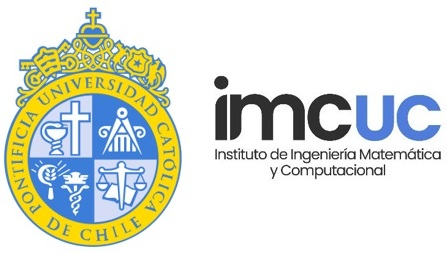  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Actividad 09: Actividad de Integración</center></h1>

Esta actividad busca que conecten el trabajo de aestadísticas y visualización básica con los algoritmos que hemos estudiado de "machine learning".

## Instrucciones

Esto Notebook contiene las instrucciones a realizar para la actividad. 

Al finalizarla, deben subir el Notebook y los archivos generados a su repositorio personal, en una carpeta nueva llamada "Actividad 07". Asegúrese que ambas ayudantes tienen acceso a su repositorio para que puedan corregir. 
    
**La actividad debe ser subida antes del final de la clase. Actualizaciones de su repositorio posteriores a esa fecha serán evaluadas con nota 1.0.**

**Conteste las preguntas en forma precisa y usando celdas de Markdown cuando sea necesario para dejar clara la respuesta.**

## Actividad

Para esta actividad utilizaremos el dataset oceanográfico **CalCOFI**, que contiene 60 años de mediciones de temperatura y salinidad del agua, además de datos sobre larvas y especies de peces. <br>

Para más información: https://calcofi.org/data/oceanographic-data/bottle-database/

La base en esta fecha posee más de 890,000 registros (y pesa más de 100 Mb). Para facilitar que lo descarguen, su lectura y modelamiento, se ha extraído un conjunto de sólo 1000 registros de este dataset, contenidos en el archivo `bottle2.csv`. Se han eliminado además la mayoría de las columnas, dejando sólo las de `salinidad` y `temperatura`.

----
***CalCOFI: Over 60 years of oceanographic data: Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?***

*The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for **documenting climatic cycles in the California Current and a range of biological responses to them.** CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.*

*The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway.* ***Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.***

----

## Rúbrica

- Si han logrado el punto 1: 2.0
- Si han logrado hasta el punto 2: 3.0
- Si han logrado hasta el punto 3 en forma parcial: 5.0
- Si han logrado hasta el punto 3 completo: 6.0
- Si han logrado todo: 7.0

In [1]:
# librerías necesarias para el ejercicio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Base de datos

### 1.1 Lectura
Lea el archivo `.csv`, dejando la información en un DataFrame.

### 1.2 Visualización
Grafique los datos en un `scatter plot` que muestre la temperatura como función de la salinidad. No olvide que todo gráfico debe tener nombres en los ejes.

In [2]:
bottle = pd.read_csv('bottle2.csv')
bottle.head()

,Unnamed: 0,temp_deg,salinity
0,0,10.50,33.440
1,1,10.46,33.440
2,2,10.46,33.437
3,3,10.45,33.420
4,4,10.45,33.421


In [3]:
bottle = bottle[['temp_deg', 'salinity']]
bottle.head()

,temp_deg,salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


Text(0, 0.5, 'Temperature')

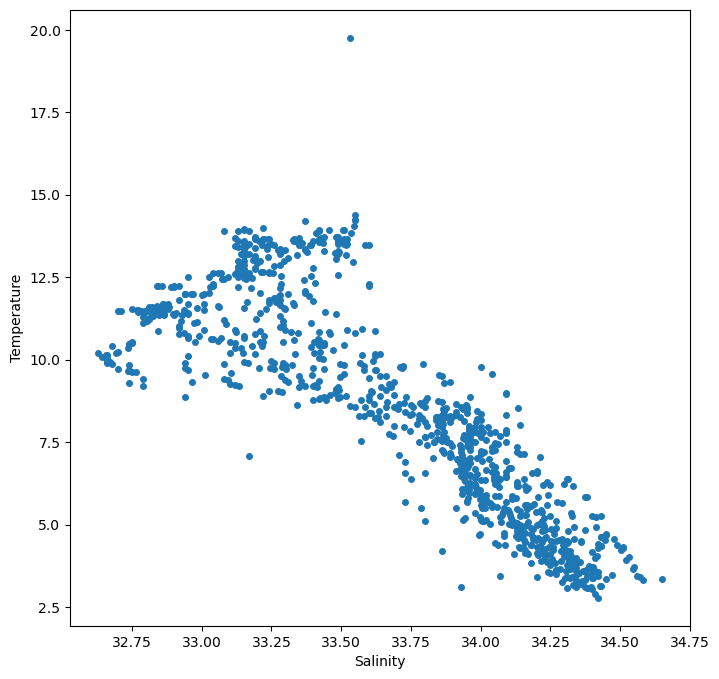

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.plot(bottle['salinity'], bottle['temp_deg'], 'o', markersize=4)
ax.set_xlabel('Salinity')
ax.set_ylabel('Temperature')

## 2. Separación de datos

Como hemos visto en clases, debemos separar los datos entre un conjunto de entrenamiento y otro de prueba/validación. Para hacerlo podemos aprovechar la librería `sklearn` que posee una función para realizar esta división. Asumiendo que sus datos están en un DataFrame llamado `bottle`, la separación entre entramiento y validación se hace de la siguiente forma:

In [5]:
# importamos la librería correspondiente
from sklearn.model_selection import train_test_split

# dividimos el dataframe 'bottle' siendo el test un 20% del total
train, test = train_test_split(bottle, test_size=0.2, random_state=42)

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 521 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   temp_deg  200 non-null    float64
 1   salinity  200 non-null    float64
dtypes: float64(2)
memory usage: 4.7 KB


### 2.1 Visualización
Vuelva a realizar el `scatter plot` mostrando de diferente color los datos que son del conjunto `train` y `test`. No olvide el nombre en los ejes y la leyenda que indique qué color es del conjunto de entrenamiento y qué color el de prueba.

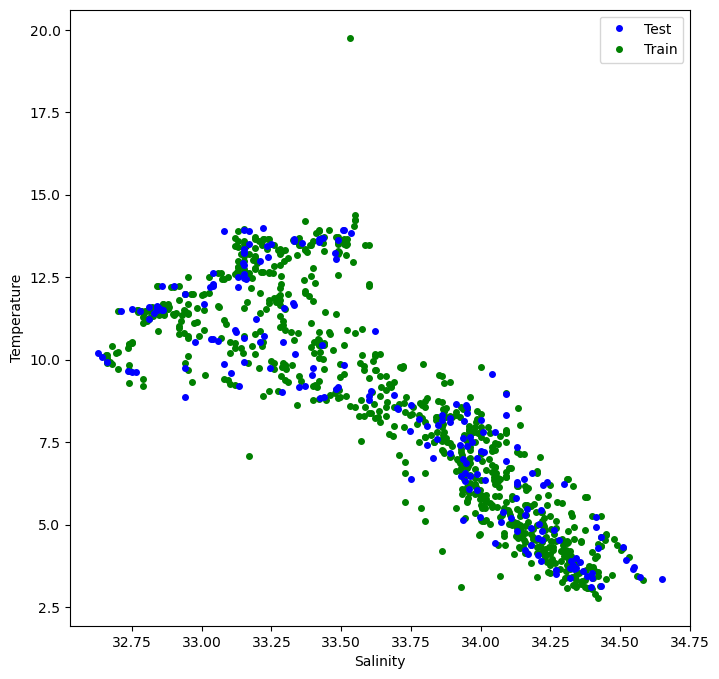

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.plot(test['salinity'], test['temp_deg'], 'o', markersize=4, color='b', zorder=1, label='Test')
plt.plot(train['salinity'], train['temp_deg'], 'o', markersize=4, color='g', zorder=0, label='Train')

ax.set_xlabel('Salinity')
ax.set_ylabel('Temperature')
ax.legend()

## 3. Regresión Lineal

Usando la librería de su preferencia (`statmodels` o `sklearn`) arme un modelo de regresión lineal para los datos de entrenamiento. Muestre los valores de beta_0 y beta_1 de su modelo.

¿Cuál es el valor de r² y RMSE de su modelo en los conjuntos de entrenamiento y de prueba?

Grafique los datos de entrenamiento, de prueba y el modelo de regresión en el mismo `scatter plot`.

In [8]:
# haremos los modelos usando la librearía sklearn en este caso.
# los inputs deben ser arreglos de numpy (en el caso del vector y podría ser Series, que es un arreglo de numpy + etiqueta)
y_train = np.array(train.temp_deg)
y_test = np.array(test.temp_deg)

#sklearn requiere que X sea una matrix de (n_samples x n_variables)
X_train = np.array(train.salinity)
X_train = X_train.reshape(X_train.shape[0], 1)

X_test = np.array(test.salinity)
X_test = X_test.reshape(X_test.shape[0], 1)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# armamos el modelo y lo entrenamos
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('coeficientes del modelo: \n', linreg.intercept_, linreg.coef_[0])

# usamos el modelo para predecir sobre el conjunto de entrenamiento
y_pred_train = linreg.predict(X_train)
R2_lineal_train = linreg.score(X_train, y_train)
rmse_train = mean_squared_error(y_train, y_pred_train)
print('\nConjunto de entrenamiento')
print(r'R^2 (train)',R2_lineal_train)
print('RMSE (train)', rmse_train)

# predecir valores de y para el set de prueba
y_pred_test = linreg.predict(X_test)
R2_lineal_test = linreg.score(X_test, y_test)
rmse_test = mean_squared_error(y_test, y_pred_test)
print('\nConjunto de prueba')
print(r'R^2 (test)',R2_lineal_test)
print('RMSE (test)', rmse_test)

coeficientes del modelo: 
 193.12586847524688 -5.4825411352986135

Conjunto de entrenamiento
R^2 (train) 0.7229498602475539
RMSE (train) 2.8778584218712315

Conjunto de prueba
R^2 (test) 0.7297761428277751
RMSE (test) 2.8473230333923834


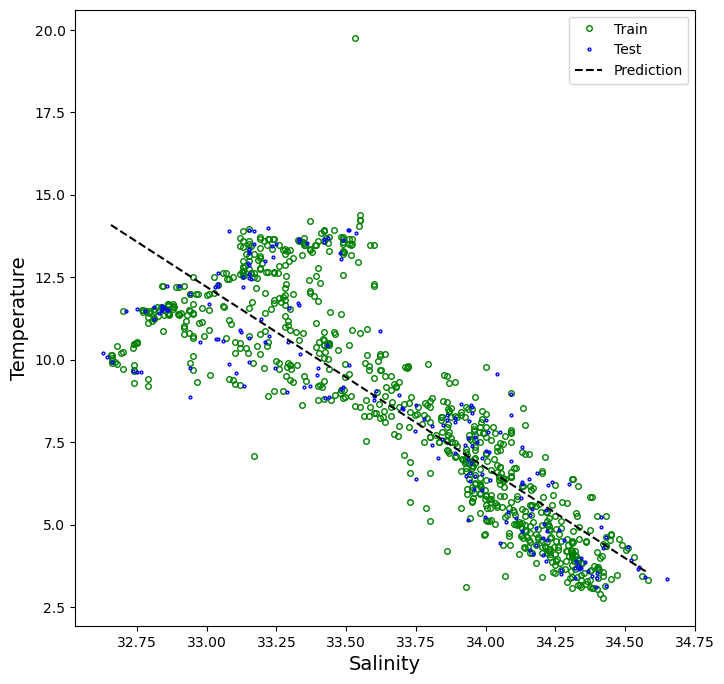

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(train.salinity, train.temp_deg, 'o', markersize=4, mec='green', mfc='None', label='Train') 
ax.plot(test.salinity, test.temp_deg, '.', markersize=4, mec='blue', mfc='None', label='Test') 

xgrid = np.linspace(np.min(train.salinity), np.max(train.salinity), 100)
ax.plot(xgrid, linreg.predict(xgrid.reshape(100, 1)),label='Prediction',color='k',ls='--')
ax.set_xlabel('Salinity',fontsize=14)
ax.set_ylabel('Temperature',fontsize=14)
ax.legend()

## 4. Regresión Polinomial

Ahora, usando nuevamente la librería de su preferencia (`statmodels` o `sklearn`), arme un modelo de regresión polinomial para los datos de entrenamiento. En este caso arme uno de grado dos y muestre los valores de beta_0, beta_1 y beta_2 de su modelo.

¿Cuál es el RMSE de su modelo en los conjuntos de entrenamiento y de prueba? ¿Son mejores que en el caso lineal?

Grafique los datos de entrenamiento, de prueba y el modelo de regresión en el mismo `scatter plot`.

In [11]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(2, include_bias=False)

expanded_train = transformer.fit_transform(X_train)

In [12]:
reg_poly = LinearRegression().fit(expanded_train, y_train)
y_pred_train = reg_poly.predict(expanded_train)

expanded_test = transformer.fit_transform(X_test)

y_pred_test = reg_poly.predict(expanded_test)

In [13]:
print('coeficientes del modelo: \n', reg_poly.intercept_, reg_poly.coef_[0], reg_poly.coef_[1])

coeficientes del modelo: 
 -4598.036436552248 279.65902692904814 -4.241529296339436


In [14]:
rmse_train = mean_squared_error(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test)

print('\nConjunto de entrenamiento')
print('RMSE (train)', rmse_train)

print('\nConjunto de prueba')
print('RMSE (test)', rmse_test)


Conjunto de entrenamiento
RMSE (train) 1.9852833556994136

Conjunto de prueba
RMSE (test) 2.0631030208473966


Vemos que tanto en el conjunto de entrenamiento como en el de prueba el valor del RMSE baja con respecto al modelo lineal.

In [15]:
# funcion para predecir
def predict_model(poly_model, x_vals, poly_transformer=None):

    # optionally use the passed-in transformer
    if poly_transformer != None:
        dm = poly_transformer.fit_transform(x_vals)
    else:
        dm = x_vals
        
    # make the prediction at each x value
    prediction = poly_model.predict(dm)
    
    return(prediction)

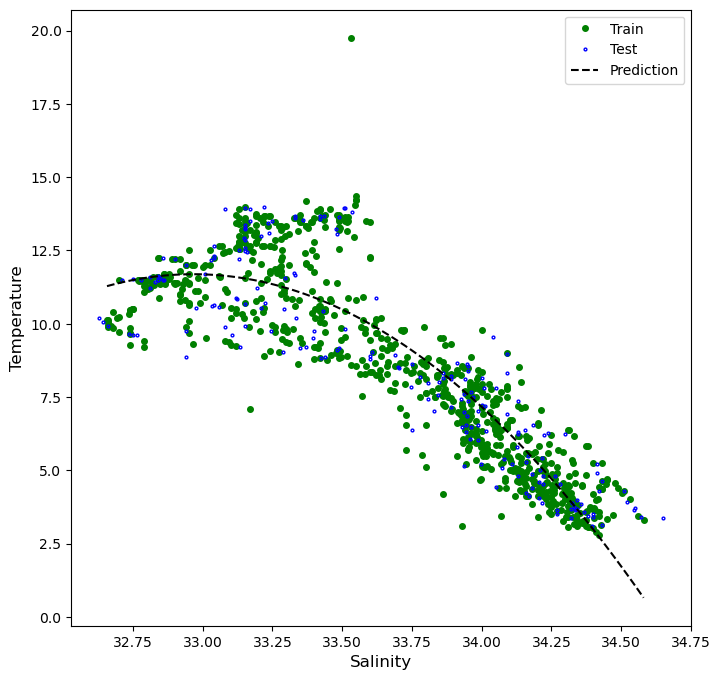

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(train.salinity, train.temp_deg, 'o', color='green',label='Train', markersize=4) 
ax.plot(test.salinity, test.temp_deg, '.', markersize=4, mec='blue', mfc='None', label='Test') 


x_vals = np.linspace(np.min(train.salinity), np.max(train.salinity), 100).reshape(-1,1)
prediction = predict_model(reg_poly,x_vals,transformer)

prediction_test = predict_model(reg_poly, X_test, transformer)

ax.plot(x_vals, prediction, label='Prediction', color='k', ls='--')
ax.set_xlabel("Salinity", fontsize=12)
ax.set_ylabel("Temperature", fontsize=12)
ax.legend()